In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import warnings
import itertools
import helpers as hp

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = hp.firstNormal(pd.read_csv("../Data/civic_survey.csv",
                     encoding = "ISO-8859-1", usecols=[0, 2, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18]))
data.columns

Index(['id', 'Area_of_interest', 'Corridor_preference',
       'Current_Transit_Frequency', 'Current_Transit_Usage',
       'Other_Transport_Used', 'Why_Other_Transport_Used', 'Age',
       'Employment_status', 'Where_From', 'Gender', 'Race'],
      dtype='object')

In [3]:
id_ind = 0
AoI_ind = 1
cor_ind = 2
transit_freq_ind = 3
transit_usage_ind = 4
other_transit_ind = 5
barr_ind = 6
age_ind = 7
emp_ind = 8
origin_ind = 9
gender_ind = 10
race_ind = 11

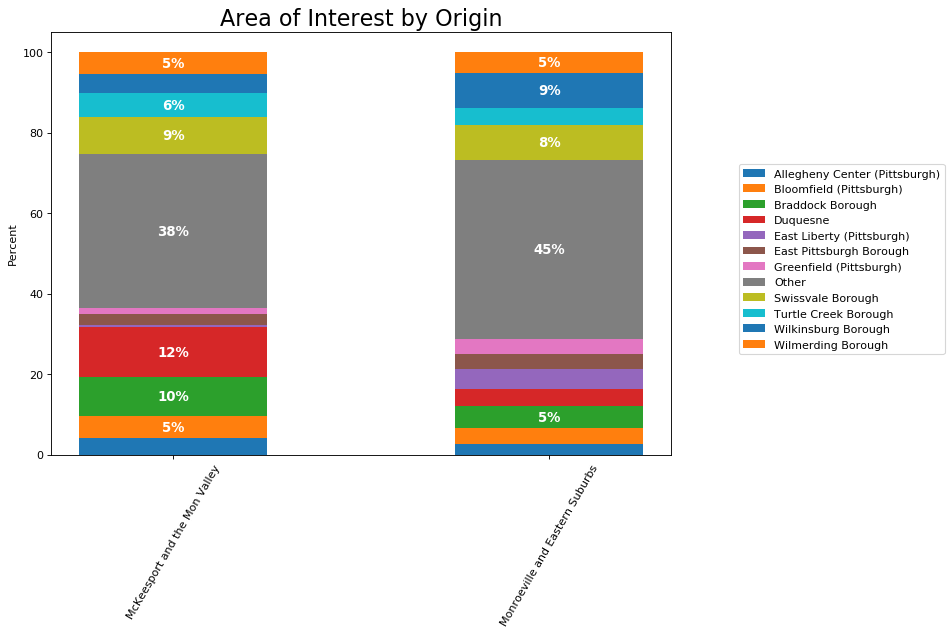

In [4]:
# Category: Area of interest
# Value: Origin

area_origin = hp.category_percents(hp.aggregate_other(data, [origin_ind], threshold=0.02),
                                  cat_index=AoI_ind,
                                  val_name = "Where_From_o")

hp.graph_percent_bars(area_origin, 
                      cat_name="Area_of_interest",
                      val_name = "Where_From_o",
                      share_name = "Share", 
                      title = "Area of Interest by Origin")

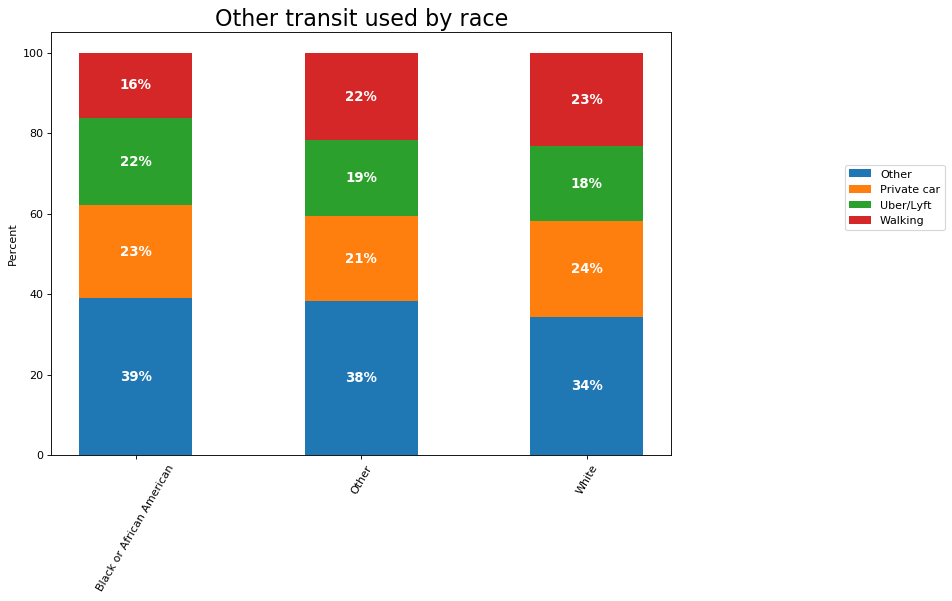

In [5]:
# Category: Race
# Value: Other transit

race_othertrans = hp.category_percents(hp.aggregate_other(data, [race_ind, other_transit_ind], threshold=0.1),
                                  cat_name="Race_o",
                                  val_name = "Other_Transport_Used_o")

hp.graph_percent_bars(race_othertrans, 
                      cat_name="Race_o",
                      val_name = "Other_Transport_Used_o",
                      share_name = "Share", 
                      title = "Other transit used by race")

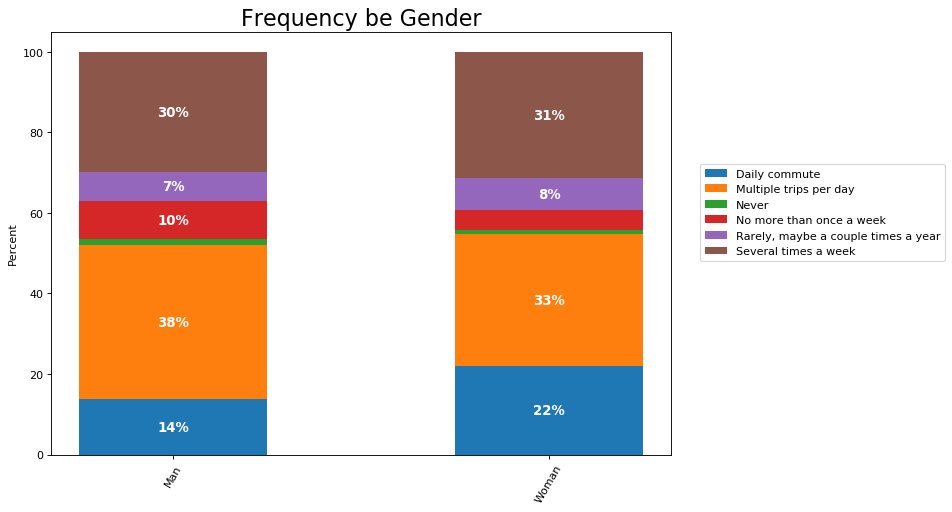

In [6]:
# Category: Gender
# Value: Frequency

gender_freq = hp.category_percents(hp.aggregate_other(data, [gender_ind], threshold=0.1),
                                  cat_name="Gender_o",
                                  val_index = transit_freq_ind,
                                  rm_other_cat=True)

hp.graph_percent_bars(gender_freq, 
                      cat_name="Gender_o",
                      val_name = "Current_Transit_Frequency",
                      share_name = "Share", 
                      title = "Frequency be Gender")

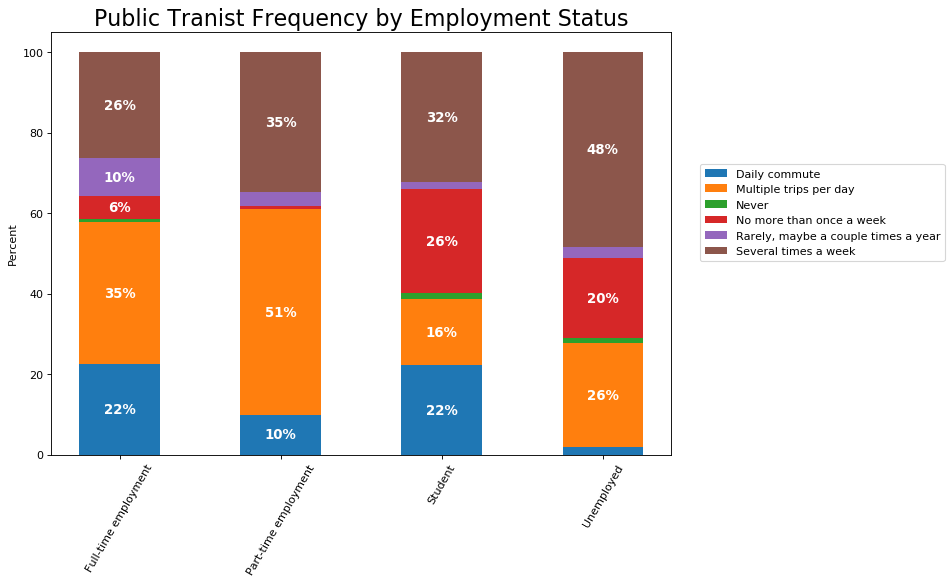

In [8]:
# Category: Employment
# Value: Frequency

emp_freq = hp.category_percents(hp.aggregate_other(data, col_inds=[emp_ind]),
                                  cat_name="Employment_status_o",
                                  val_index = transit_freq_ind,
                                  rm_other_cat=True)

hp.graph_percent_bars(emp_freq,
                      cat_name="Employment_status_o",
                      val_name = "Current_Transit_Frequency",
                      share_name = "Share", 
                      title = "Public Tranist Frequency by Employment Status")